# Explore fault data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py 
import cv2
import os
import segyio

# Visualize 3d origin public data

In [2]:
root_path = '/home/zhangzr/Fault_Recong/Fault_data/public_data/precessed'
ori_seis = np.load(os.path.join(root_path, 'train', 'seis', 'seistrain.npy'), mmap_mode='r')
ori_label = np.load(os.path.join(root_path, 'train', 'fault', 'faulttrain.npy'), mmap_mode='r')

0.012508716929476197


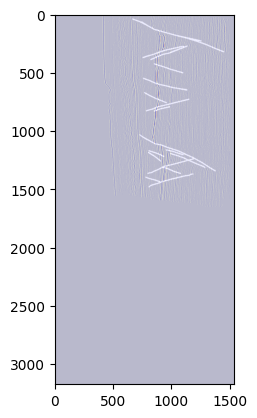

In [3]:
slice_id = 20
plt.imshow(ori_seis[slice_id,:,:], cmap='seismic')
plt.imshow(ori_label[slice_id,:,:], cmap='gray', alpha=0.2)
print(np.mean(ori_label[slice_id,:,:]))
# fig.axes.xaxis.set_visible(False)
# fig.axes.yaxis.set_visible(False)
plt.show()

[0 1]
0.037665406427221174


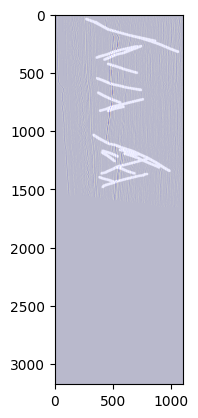

In [4]:
plt.imshow(ori_seis[slice_id,:,400:1500], cmap='seismic')
dilate_label = cv2.dilate(ori_label[slice_id,:,400:1500], kernel=np.ones((3,3), dtype=np.uint8), iterations=5)
print(np.unique(dilate_label))
print(np.mean(dilate_label))
plt.imshow(dilate_label, cmap='gray', alpha=0.2)
# fig.axes.xaxis.set_visible(False)
# fig.axes.yaxis.set_visible(False)
plt.show()

# Visualize 3d origin real labeled data

In [10]:
root_path = "/home/zhangzr/FaultRecongnition/Fault_data/real_labeled_data"
ori_seis = segyio.tools.cube(os.path.join(root_path, 'origin_data', 'seis' , 'mig_fill.sgy'))
ori_label = segyio.tools.cube(os.path.join(root_path, 'origin_data', 'fault', 'label_fill.sgy'))

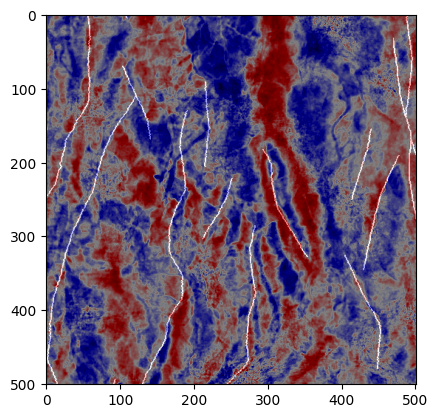

In [11]:
slice_id = 10
plt.imshow(ori_seis[slice_id,:,:], cmap='seismic')
plt.imshow(ori_label[slice_id,:,:], cmap='gray', alpha=0.5)
plt.show()

# Visualize 3d public crop data

In [2]:
root_path = '/home/zhangzr/Fault_Recong/Fault_data/public_data/'
scr_root_path = os.path.join(root_path, 'crop_192_filted_003')
data_split = 'train'
data_lst = os.listdir(os.path.join(scr_root_path, data_split))
index = 105
with h5py.File(os.path.join(scr_root_path, data_split, data_lst[index]), 'r') as f:
    seis = f['raw'][:]
    label = f['label'][:]

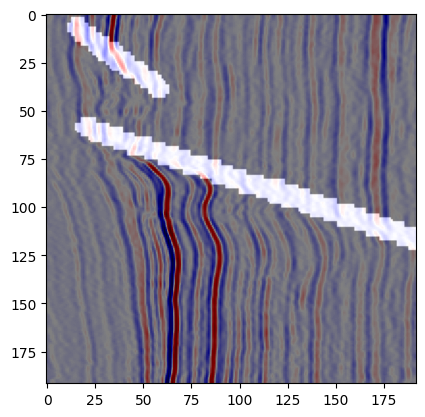

In [7]:
slice_id = 99
plt.imshow(seis[slice_id,:,:], cmap='seismic')
plt.imshow(label[slice_id,:,:], cmap='gray', alpha=0.5)
plt.show()

# Visualize simulate data

In [17]:
root_dir = '/home/zhangzr/FaultRecongnition/Fault_data/simulate_data'
name = '50.dat'
split = 'train'
seis = np.fromfile(os.path.join(root_dir, split, 'seis', name), dtype=np.single)
label = np.fromfile(os.path.join(root_dir, split, 'fault', name), dtype=np.single)
# reshape into 128 * 128 * 128
seis = seis.reshape((128, 128, 128))
label = label.reshape((128, 128, 128))

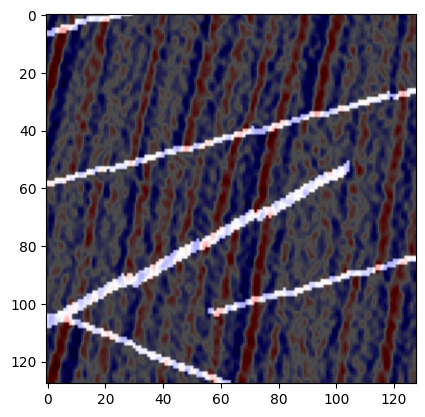

In [18]:
slice_id = 15
plt.imshow(seis[:,slice_id,:], cmap='seismic')
plt.imshow(label[:,slice_id,:], cmap='gray', alpha=0.7)
plt.show()

# Visulize 2D Crop Data

In [2]:
root_dir = '/home/zhangzr/FaultRecongnition/Fault_data/real_labeled_data/2d_slices'
split = 'val'
data_lst = os.listdir(os.path.join(root_dir, split, 'image'))

In [3]:
idx = 10
image_name = data_lst[idx]
image = np.load(os.path.join(root_dir,  split,'image', image_name))
label = cv2.imread(os.path.join(root_dir,  split,'ann', image_name.replace('.npy', '.png')), cv2.IMREAD_UNCHANGED)
print(label.sum()/(label.shape[0] * label.shape[1]))

0.028833718331128005


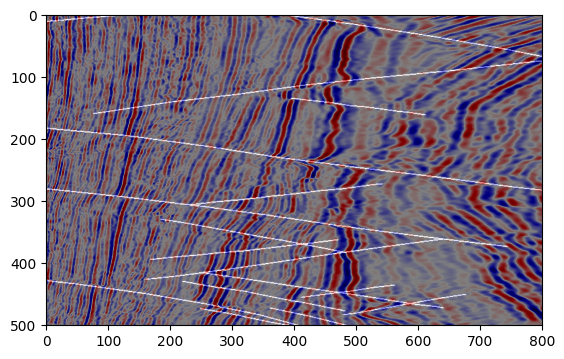

In [5]:
plt.imshow(image, cmap='seismic')
plt.imshow(label, cmap='gray', alpha=0.5)
plt.show()

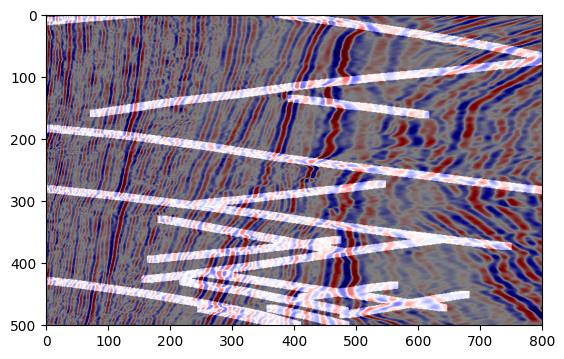

In [6]:
plt.imshow(image, cmap='seismic')
kernel = np.ones((3,3), dtype=np.uint8)
plt.imshow(cv2.dilate(label, kernel=kernel, iterations=5), cmap='gray', alpha=0.5)
plt.show()

# Visualize 2D data

In [2]:
root_dir = '/home/zhangzr/Fault_Recong/Fault_data/2Dfault_0519_256'
idx = 10
image = np.fromfile(os.path.join(root_dir, '0519_4_256', '0519', '0519-1700-256', f'GYX3D2018-PSDM-VTI-CG1203-400Km2-DP-50_Feature{idx}.bin'), dtype=np.double).reshape(256, 256)
label = np.fromfile(os.path.join(root_dir, '0519_4_256', '0519', '0519-1700-256', f'Label{idx}.bin'), dtype=np.double).reshape(256, 256)

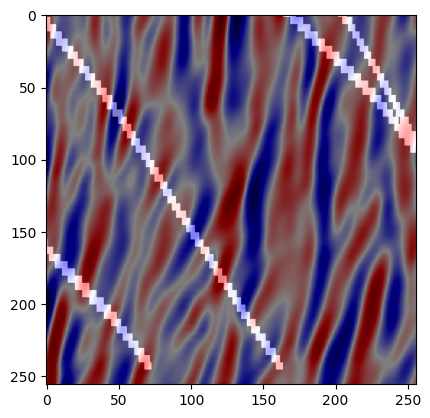

In [3]:
plt.imshow(image, cmap='seismic')
plt.imshow(label, cmap='gray', alpha=0.5)
plt.show()

In [2]:
root_dir = '/home/zhangzr/Fault_Recong/Fault_data/2Dfault_0519_256/converted/train'
idx = 50
image_lst = os.listdir(os.path.join(root_dir, 'image'))
image = np.load(os.path.join(root_dir, 'image', image_lst[idx]))
label = cv2.imread(os.path.join(root_dir, 'ann', image_lst[idx].replace('npy', 'png')), cv2.IMREAD_UNCHANGED)

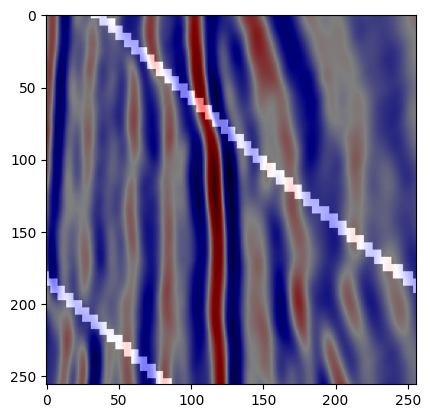

In [3]:
plt.imshow((image - image.min())/(image.max() - image.min()), cmap='seismic')
plt.imshow(label, cmap='gray', alpha=0.5)
plt.show()